# Mechanical Property Prediction Model for Hot Rolling Process
In this Project, the dataset is about the hot rolled coils post cooling, machined and mechanical tests which are used to evaluate mechanical properties.
<h5>What is Hot Rolling?</h5>
Hot rolling is an important process wherein continuously cast slabs are heated and rolled above the recrystallization temperature to form thin sheets or coils. The composition and the process parameters play an important parameter in achieving the final mechanical properties of hot rolled steel.

Model Developing will be used by taking compositional, thermal and dimensional parameters as input for predicting final mechanical properties at the end of hot rolling process using multi linear regression and random forest algorithms

In [3]:
# Import the required libraries 
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import collections
import pickle

### Understanding the Dataset
### `HSM2 Dataset.csv`:
We have downloaded a **`HSM2 Dataset.csv`**, of coil Temperature, Dimensions and Percentage of its elements 
- **Coil ID**
- **Furnace Exit temp**
- **RM1 Exit**
- **RM2 Drop Out temp**
- **FM Entry Temp**
- **FM Exit Temp**
- **Coiling Temp**
- **Original Slab Thickness**
- **Slab Width**
- **Slab Length**
- **RM2 Exit Length**
- **RM2 Exit Thickness**
- **FM Entry Wid**
- **FM Entry Thk**
- **FM Entry Len**
- **Final Thickness**
- **Coil Len** : Coil Length
- **f_PcntAl** : Precentage of Alluminium
- **f_PcntB** : Precentage of Boron
- **f_PcntC** : Precentage of Carbon
- **f_PcntCa**: Precentage of Calcium
- **f_PcntNb**: Precentage of Niobium
- **f_PcntCr**: Precentage of Chromium
- **f_PcntCu**: Precentage of Copper
- **f_PcntMn**: Precentage of Manganese
- **f_PcntMo**: Precentage of Molybednum
- **f_PcntN**: Precentage of Nitrogen
- **f_PcntNi**: Precentage of Nickel
- **f_PcntP**: Precentage of Phosphorous
- **f_PcntS**: Precentage of Sulphur
- **f_PcntSi**: Precentage of Silicon
- **f_PcntSn**: Precentage of Tin
- **f_PcntTi**: Precentage of Titanium
- **f_PcntV**: Precentage of Vanadium
- **YS (Mpa)**: Yield Strength
- **UTS (Mpa)**: Ultimate Tensile Strength

In [4]:
# Import the excel dataset
from sqlalchemy import create_engine
engine = create_engine('sqlite://', echo=False)
file = input('Enter the excel file for prediction: ')
df = pd.read_excel(file)
df.head()

Enter the excel file for prediction: C:\Users\garim\Downloads\HSM2 Dataset.xlsx


,Coil ID,Furnace Exit temp,RM1 Exit,RM2 Drop Out temp.,FM Entry Temp,FM Exit Temp,Coiling Temp,Original Slab Thickness,Slab Width,Slab Length,...,f_PcntN,f_PcntNi,f_PcntP,f_PcntS,f_PcntSi,f_PcntSn,f_PcntTi,f_PcntV,YS (Mpa),UTS (Mpa)
0,19679009,1303.594,1043.169,1042.417,968,876.7108,621.9152,224.5,1313,11.18,...,0.0045,0.007,0.012,0.0044,0.017,0.001,0.018,0.003,445,472
1,19679010,1293.303,1027.293,1026.546,950,872.3495,621.4305,224.4,1313,11.16,...,0.0045,0.007,0.012,0.0044,0.017,0.001,0.018,0.003,445,472
2,19679011,1297.567,1039.006,1038.730,989,872.2347,621.3252,224.5,1313,9.05,...,0.0046,0.006,0.014,0.0046,0.006,0.001,0.001,0.001,366,454
3,19679012,1295.043,1039.496,1039.228,987,875.3984,621.3052,224.5,1313,9.05,...,0.0046,0.006,0.014,0.0046,0.006,0.001,0.001,0.001,366,454
4,19679041,1262.333,1040.285,1039.984,990,902.8033,634.3483,224.5,1289,10.92,...,0.0026,0.006,0.014,0.0097,0.027,0.001,0.001,0.001,324,375


In [5]:
# Database conversion
df.to_sql(r'C:\Users\garim\OneDrive\Desktop\uts_ys_.db', con=engine, index=True, index_label='id', if_exists='replace')

In [6]:
# checking the column names 
df.columns[1]

'Furnace Exit temp'

In [7]:
df2 = df.corr()
df1 = df2.round(decimals=2)
df1.head()

,Coil ID,Furnace Exit temp,RM1 Exit,RM2 Drop Out temp.,FM Entry Temp,FM Exit Temp,Coiling Temp,Original Slab Thickness,Slab Width,Slab Length,...,f_PcntN,f_PcntNi,f_PcntP,f_PcntS,f_PcntSi,f_PcntSn,f_PcntTi,f_PcntV,YS (Mpa),UTS (Mpa)
Coil ID,1.00,-0.02,0.17,0.16,0.10,0.13,0.08,0.00,-0.01,0.08,...,-0.01,-0.03,0.03,0.06,0.03,0.0,-0.06,-0.01,0.04,-0.01
Furnace Exit temp,-0.02,1.00,0.01,0.02,0.13,-0.03,-0.17,0.04,-0.11,0.27,...,0.13,-0.02,-0.06,-0.06,-0.22,0.0,0.11,0.08,-0.03,0.02
RM1 Exit,0.17,0.01,1.00,1.00,0.43,0.17,-0.17,0.05,-0.01,-0.07,...,-0.00,-0.04,-0.02,0.11,-0.22,-0.0,0.12,0.10,0.16,-0.01
RM2 Drop Out temp.,0.16,0.02,1.00,1.00,0.42,0.16,-0.17,0.06,-0.02,-0.08,...,0.00,-0.03,-0.02,0.11,-0.23,0.0,0.13,0.11,0.17,-0.02
FM Entry Temp,0.10,0.13,0.43,0.42,1.00,0.22,0.30,0.03,0.41,-0.00,...,-0.16,-0.03,0.11,-0.00,0.08,-0.0,-0.23,-0.04,-0.30,-0.15


In [8]:
#  full statistics of the data
df.describe()

,Coil ID,Furnace Exit temp,RM1 Exit,RM2 Drop Out temp.,FM Entry Temp,FM Exit Temp,Coiling Temp,Original Slab Thickness,Slab Width,Slab Length,...,f_PcntN,f_PcntNi,f_PcntP,f_PcntS,f_PcntSi,f_PcntSn,f_PcntTi,f_PcntV,YS (Mpa),UTS (Mpa)
count,3.799000e+03,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,...,3799.000000,3799.000000,3799.000000,3799.000000,3799.000000,3.799000e+03,3799.000000,3799.000000,3799.000000,3799.000000
mean,1.968467e+07,1291.586578,1045.948750,1046.020969,999.102395,880.086528,618.373409,224.443590,1579.216373,10.352632,...,0.003526,0.007071,0.014541,0.005678,0.052065,1.000000e-03,0.005124,0.002918,361.026059,459.523032
std,3.064827e+03,24.130300,19.411015,19.371578,18.086484,14.909147,22.544082,0.786775,241.581461,0.780653,...,0.000794,0.009333,0.004787,0.001995,0.059398,8.089213e-17,0.007784,0.008591,86.320173,96.532270
min,1.967901e+07,1205.030000,940.465600,941.169200,916.000000,814.920600,482.812300,199.000000,1028.000000,7.650000,...,0.001700,0.005000,0.004000,0.001800,0.001000,1.000000e-03,0.001000,0.001000,226.000000,324.000000
25%,1.968222e+07,1276.921000,1033.513000,1033.647000,988.000000,870.108350,613.389150,224.400000,1364.000000,9.700000,...,0.003000,0.006000,0.012000,0.004300,0.010000,1.000000e-03,0.001000,0.001000,306.000000,382.000000
50%,1.968497e+07,1292.323000,1047.073000,1047.320000,1000.000000,877.423500,622.697900,224.500000,1632.000000,10.560000,...,0.003400,0.007000,0.014000,0.005300,0.018000,1.000000e-03,0.001000,0.001000,330.000000,453.000000
75%,1.968731e+07,1306.140500,1059.718000,1059.668000,1011.000000,888.964450,631.318550,224.500000,1702.500000,11.110000,...,0.004000,0.007000,0.017000,0.006800,0.086000,1.000000e-03,0.003000,0.001000,378.000000,483.000000
max,1.968958e+07,1384.494000,1095.869000,1095.742000,1056.000000,944.995000,692.242800,265.300000,2101.000000,11.220000,...,0.006900,0.258000,0.101000,0.015000,0.380000,1.000000e-03,0.065000,0.085000,692.000000,925.000000


In [9]:
# Rename the target coulumn names
df.rename(columns = {'UTS (Mpa)':'UTS_mpa', 'YS (Mpa)': 'YS_mpa'}, inplace = True)
df.head()

,Coil ID,Furnace Exit temp,RM1 Exit,RM2 Drop Out temp.,FM Entry Temp,FM Exit Temp,Coiling Temp,Original Slab Thickness,Slab Width,Slab Length,...,f_PcntN,f_PcntNi,f_PcntP,f_PcntS,f_PcntSi,f_PcntSn,f_PcntTi,f_PcntV,YS_mpa,UTS_mpa
0,19679009,1303.594,1043.169,1042.417,968,876.7108,621.9152,224.5,1313,11.18,...,0.0045,0.007,0.012,0.0044,0.017,0.001,0.018,0.003,445,472
1,19679010,1293.303,1027.293,1026.546,950,872.3495,621.4305,224.4,1313,11.16,...,0.0045,0.007,0.012,0.0044,0.017,0.001,0.018,0.003,445,472
2,19679011,1297.567,1039.006,1038.730,989,872.2347,621.3252,224.5,1313,9.05,...,0.0046,0.006,0.014,0.0046,0.006,0.001,0.001,0.001,366,454
3,19679012,1295.043,1039.496,1039.228,987,875.3984,621.3052,224.5,1313,9.05,...,0.0046,0.006,0.014,0.0046,0.006,0.001,0.001,0.001,366,454
4,19679041,1262.333,1040.285,1039.984,990,902.8033,634.3483,224.5,1289,10.92,...,0.0026,0.006,0.014,0.0097,0.027,0.001,0.001,0.001,324,375


In [12]:
df1.drop(['YS (Mpa)', 'UTS (Mpa)'], axis =1)
final_YS = []
valYS = input('Enter the minimum Correlation value for YS: ')
for i in range (1, 34):
    if abs(df1.iloc[i, 34].astype(float)) >= abs(float(valYS)) :
        final_YS.append(df1.columns[i])

final_YS

Enter the minimum Correlation value for YS: 0.55


['Slab Width', 'f_PcntCa', 'f_PcntNb', 'f_PcntMn', 'f_PcntTi']

In [47]:
final_UTS = []
valUTS = input('Enter the minimum Correlation value for UTS: ')
for i in range (1, 34):
    if abs(df1.iloc[i, 35].astype(float)) >= abs(float(valUTS)):
        final_UTS.append(df1.columns[i])
        
final_UTS

Enter the minimum Correlation value for UTS: 0.5


['f_PcntC', 'f_PcntCa', 'f_PcntNb', 'f_PcntMn', 'f_PcntN', 'f_PcntSi']

### Correlation Matrix
The parameters with respect to Yield Strength and Ultimate Tensile Strength which have correlation between 0.5 and -0.5 have week positive/negative correlation whereas the parameter which have correlation between 0.5 to 1 and -0.5 to -1 have strong positive/negative correlation. Hence, we will pick the parameters with strong negative/positive correlation.

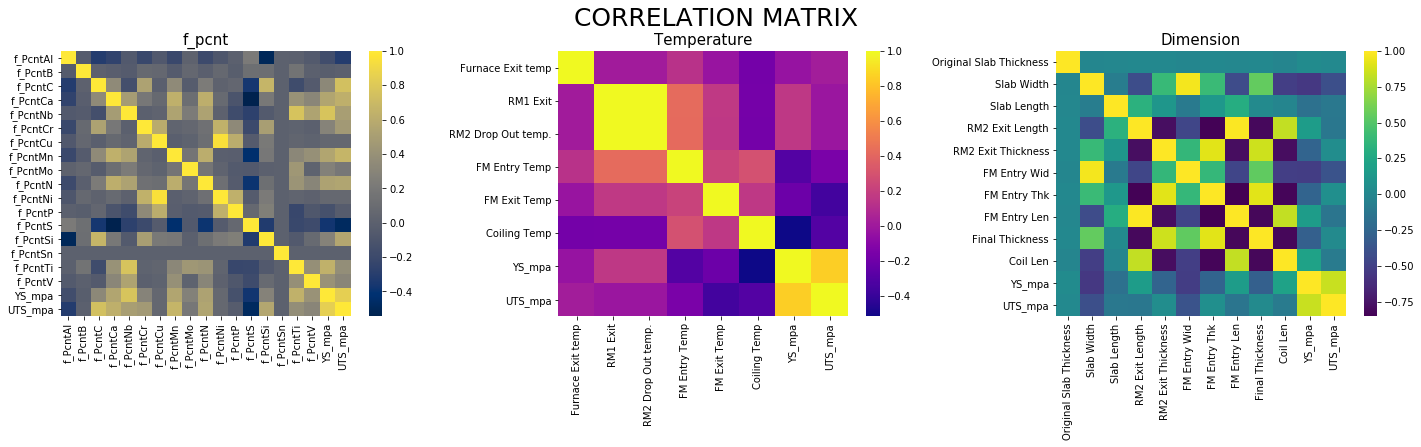

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7))
fig.suptitle('CORRELATION MATRIX',fontsize=25)

corr = df.iloc[:, 17:36].corr()
sb.heatmap(data = corr,ax = axes[0], cmap = 'cividis')
axes[0].set_title('f_pcnt',fontsize=15)

corr = df.iloc[:, [1,2,3,4,5,6,34,35]].corr()
sb.heatmap(data = corr,ax = axes[1], cmap = 'plasma')
axes[1].set_title('Temperature',fontsize=15)

corr = df.iloc[:, [7,8,9,10,11,12,13,14,15,16,34,35]].corr()
sb.heatmap(data = corr, ax = axes[2], cmap = 'viridis')
axes[2].set_title('Dimension',fontsize=15)
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

### Data Cleaning

In [12]:
# df.drop(['Coil ID','Original Slab Thickness','f_PcntB','f_PcntCa','f_PcntCr','f_PcntCu','f_PcntMo'], inplace = True, axis =1)
# df.drop(['f_PcntN','f_PcntNi','f_PcntSn','f_PcntV'], inplace =True , axis =1)
# df.head()

In [13]:
df2 = df.drop(['YS_mpa', 'UTS_mpa'], axis = 1)

## Yield Strength Modeling

### Train-Test Split

In [18]:
# Defining the input and target data
X = df[final_YS] 
Y = df[['YS_mpa']]

# Train_Test_Split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

### Multiple Linear Regression

In [37]:
# Defining the model of Linear Regression
reg_ys = linear_model.LinearRegression()

# Fitting the model
reg_ys.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# Predict the test value
Y_pred = reg_ys.predict(X_test)

In [39]:
# The coefficients and Intercept values
print ('Coefficients: ', reg_ys.coef_)
print ('Intercept: ', reg_ys.intercept_)

Coefficients:  [[ -2.76380329 -56.88164812  28.9460664    1.94108396  38.54392918
   20.36283967  -0.54010315   5.64508584]]
Intercept:  [361.09147746]


In [40]:
# Residual sum square: smaller value indicates a better model, as there is less variation in the data
print("Residual sum of squares: %.2f"
      % np.mean((Y_pred - Y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg_ys.score(X_test, Y_test))

#Calculated r2_score 
print("Accuracy Score:", r2_score(Y_test, Y_pred)*100)

Residual sum of squares: 1839.56
Variance score: 0.75
Accuracy Score: 75.48103792056227


In [ ]:
pickle.dump(reg_ys, open('model_regYS.pkl', 'wb'))

### Standard Scaler

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Random Forest

In [20]:
# Defining the model for Random Forest Regressor
model = RandomForestRegressor(n_jobs = -1)

0.9579989061653911
190


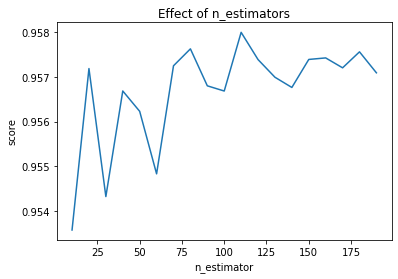

In [21]:
# Estimating the best possible n_estimator by visualizing it
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, Y_train['YS_mpa'])
    scores.append(model.score(X_test, Y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
print(np.amax(scores))
print(np.amax(estimators))

In [22]:
# Building the model with best n_estimator
regressor = RandomForestRegressor(n_estimators = 190, random_state =0)

# Fit the Model
regressor.fit(X_train, Y_train['YS_mpa'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=190, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [23]:
# Predict the test value
y_pred = regressor.predict(X_test)

In [24]:
# Calculating the Score and Error values
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
print('Acuuracy:', metrics.r2_score(Y_test, y_pred)*100)

Mean Absolute Error: 12.169314404432134
Mean Squared Error: 320.1738415585363
Root Mean Squared Error: 17.89340217953356
Acuuracy: 95.73249398008925


### Visualize Tree

In [ ]:
# building the model for visualizing the tree to a particular depth
model = RandomForestRegressor(random_state =0, max_depth = 4)
model.fit(X_train, Y_train['YS_mpa'])

# Forming the estimator
estimator = model.estimators_[5]
dot_data = StringIO()
# naming the file
filename = 'tree.png'
# naming the features
feature_name= df2.columns

# visualize the tree
export_graphviz(estimator, feature_names = feature_name, class_names=np.unique(Y_train['YS_mpa']), out_file=dot_data, rounded = True, proportion = False, special_characters = True,precision = 2, rotate = False, filled = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

# representing the tree with particular colors
colors = ('darkturquoise', 'pink2')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
Image(graph.create_png(), width = 900, height = 4000)

## Ultimate Tensile Strength Modelling

### Train-Test Split

In [26]:
# Defining the input and target data
x = df[final_UTS]
y = df[['UTS_mpa']]

# Train_Test_Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Multiple Linear Regression

In [33]:
# Defining the model of Linear Regression
reg_uts = linear_model.LinearRegression()

# Fitting the model
reg_uts.fit (x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Predict the test value
y_pred = reg_uts.predict(x_test)

In [35]:
# The coefficients
print ('Coefficients: ', reg_uts.coef_)
print ('Intercept: ', reg_uts.intercept_)

Coefficients:  [[69.2470734   4.2630175  51.58427997  7.6617793   1.48901299  8.47388304]]
Intercept:  [459.307667]


In [36]:
# Residual sum square: smaller value indicates a better model, as there is less variation in the data.
print("Residual sum of squares: %.2f"
      % np.mean((y_pred - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % reg_uts.score(x_test, y_test))

# Calculated r2_score 
print("Accuracy Score:", r2_score(y_test, y_pred)*100)

Residual sum of squares: 522.23
Variance score: 0.94
Accuracy Score: 94.44146521597648


In [ ]:
pickle.dump(reg_uts, open('model_reg_uts.pkl', 'wb'))

### Standard Scaler

In [27]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
# Defining the model for Random Forest Regression
model1 = RandomForestRegressor(n_jobs = -1)

0.9849640969926043
190


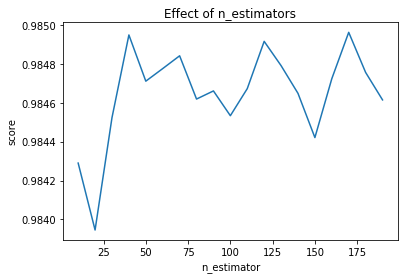

In [29]:
# Estimating the best possible n_estimator by visualizing it
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train['UTS_mpa'])
    scores.append(model.score(x_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)
print(np.amax(scores))
print(np.amax(estimators))

In [30]:
# Building the model with best n_estimator
regressor = RandomForestRegressor(n_estimators = 190, random_state =0)

# Fit the model
regressor.fit(x_train, y_train['UTS_mpa'])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=190, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [31]:
# Predict the test value
y_pred = regressor.predict(x_test)

In [32]:
# Calculating the Score and Error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy:', metrics.r2_score(y_test, y_pred)*100)

Mean Absolute Error: 7.506960541135856
Mean Squared Error: 146.41815058043264
Root Mean Squared Error: 12.100336796157066
Accuracy: 98.44155509503129


In [ ]:
pickle.dump(regressor, open('model_RFUTS.pkl', 'wb'))

### Visualize Tree

In [ ]:
# building the model for visualizing the tree to a particular depth
model = RandomForestRegressor(random_state = 0, max_depth = 4)
model.fit(x_train, y_train['UTS_mpa'])

# Forming the estimator
estimator = model.estimators_[5]
dot_data = StringIO()
# naming the file
filename = 'tree2.png'
# naming the features
feature_name= df2.columns

# visualize the tree
export_graphviz(estimator, feature_names = feature_name, class_names=np.unique(y_train['UTS_mpa']), out_file=dot_data, rounded = True, 
                proportion = False, special_characters = True,precision = 2, rotate = False, filled = True)

# representing the tree with particular colors
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

colors = ('darkseagreen1', 'lavenderblush2')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
        
Image(graph.create_png(), width = 900, height = 4000)